## Undergradute Research: Propogating Surface Plasmon Resonance as a Nanoloar Sensing Technique

# Project: Generate a heat map of expected wavelenths for a range of incident angles and refractive indexes

In [63]:
import pandas as pd
import math 
import numpy as np 
import matplotlib.pyplot as plt
from math import sin,cos,exp,log, sqrt 

df = pd.read_csv('Johnson.csv')
print(df)

        wl     n       k
0   0.1879  1.28   1.188
1   0.1916  1.32   1.203
2   0.1953  1.34   1.226
3   0.1993  1.33   1.251
4   0.2033  1.33   1.277
5   0.2073  1.30   1.304
6   0.2119  1.30   1.350
7   0.2164  1.30   1.387
8   0.2214  1.30   1.427
9   0.2262  1.31   1.460
10  0.2313  1.30   1.497
11  0.2371  1.32   1.536
12  0.2426  1.32   1.577
13  0.2490  1.33   1.631
14  0.2551  1.33   1.688
15  0.2616  1.35   1.749
16  0.2689  1.38   1.803
17  0.2761  1.43   1.847
18  0.2844  1.47   1.869
19  0.2924  1.49   1.878
20  0.3009  1.53   1.889
21  0.3107  1.53   1.893
22  0.3204  1.54   1.898
23  0.3315  1.48   1.883
24  0.3425  1.48   1.871
25  0.3542  1.50   1.866
26  0.3679  1.48   1.895
27  0.3815  1.46   1.933
28  0.3974  1.47   1.952
29  0.4133  1.46   1.958
30  0.4305  1.45   1.948
31  0.4509  1.38   1.914
32  0.4714  1.31   1.849
33  0.4959  1.04   1.833
34  0.5209  0.62   2.081
35  0.5486  0.43   2.455
36  0.5821  0.29   2.863
37  0.6168  0.21   3.272
38  0.6595  0.14   3.697


In [64]:
n_glass = 1.5168 #refractive index of glass

Au_n = np.array(df.n) 
Au_k = np.array(df.k)
Au_nk = Au_n+ 1j*Au_k #complex refractive index of gold

e = (Au_nk)**2  # calculation of complex permittivity (e = n^2)
e1 = e.real 
e2 = e.imag

rhs = [0]*len(df) #initializing right hand side of SPR equation
lhs= [0]*len(df) #SPR initialization for left hand side equation

df["e1"] = e1
df["e2"] = e2
df["A"] = rhs
df["B"] = lhs
print(df)

        wl     n       k          e1        e2  A  B
0   0.1879  1.28   1.188    0.227056   3.04128  0  0
1   0.1916  1.32   1.203    0.295191   3.17592  0  0
2   0.1953  1.34   1.226    0.292524   3.28568  0  0
3   0.1993  1.33   1.251    0.203899   3.32766  0  0
4   0.2033  1.33   1.277    0.138171   3.39682  0  0
5   0.2073  1.30   1.304   -0.010416   3.39040  0  0
6   0.2119  1.30   1.350   -0.132500   3.51000  0  0
7   0.2164  1.30   1.387   -0.233769   3.60620  0  0
8   0.2214  1.30   1.427   -0.346329   3.71020  0  0
9   0.2262  1.31   1.460   -0.415500   3.82520  0  0
10  0.2313  1.30   1.497   -0.551009   3.89220  0  0
11  0.2371  1.32   1.536   -0.616896   4.05504  0  0
12  0.2426  1.32   1.577   -0.744529   4.16328  0  0
13  0.2490  1.33   1.631   -0.891261   4.33846  0  0
14  0.2551  1.33   1.688   -1.080444   4.49008  0  0
15  0.2616  1.35   1.749   -1.236501   4.72230  0  0
16  0.2689  1.38   1.803   -1.346409   4.97628  0  0
17  0.2761  1.43   1.847   -1.366509   5.28242

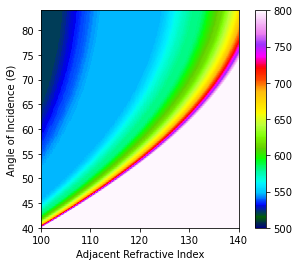

In [66]:
start_ang = 42.5 #initializing range of theta values to plot
stop_ang = 84
ang_step = 100   # Number of angles for calculation 
ang = np.linspace(start_ang, stop_ang, ang_step) # array with number of angles

index_steps = 200 # Number of refractive index values to be calculated
n_liq = np.linspace(1.0, 1.4, index_steps) #ranges from 1.0 (air) to 1.36 (alcohol)

wavelength = [1] * index_steps #initializing arrays

data = np.arange(0, steps * ang_step).reshape((ang_step, index_steps)) #data array for colormap reshape(angles,refractive_index)

for a in range(len(ang)): 
    angle = ang[a]
    
    for l in range(0, steps, 1):
        e_l = [n_liq[l]**2]*len(Au_n) # squaring n value to get e value
        lhs = n_glass * sin(angle * math.pi / 180) #left side of SPR equation
        rhs1 = ((e * e_l) / (e + e_l)) #right side of SPR equation
        
        for i in range(len(rhs1)):
            rhs[i] = np.sqrt(rhs1[i])
            
        df.A = rhs
        df.B = lhs
        
        xvals = np.linspace(0.1879, 1.9370, 1000)     #1000 is the number of wavelength values at which the df.wl is interpolated)
        yinterp_A = np.interp(xvals, df.wl, df.A)
        yinterp_B = np.interp(xvals, df.wl, df.B)

        y_location = np.abs(yinterp_A - yinterp_B)
        index = y_location.argmin()        
        
        wavelength[l] = xvals[index] * 1000
        
    data[a,:] = wavelength
    
     
plt.imshow(data, cmap='gist_ncar', origin='lower', vmin=500, vmax=800,extent=[100, 140, 40, 84])
plt.xlabel("Adjacent Refractive Index")
plt.ylabel("Angle of Incidence (\u03F4)")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar()
plt.show() 

   


